In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

print("Libraries imported successfully.")

Libraries imported successfully.


In [ ]:
dataset_df = pd.read_csv('/content/Dataset.csv')
print("Dataset.csv loaded successfully.")
display(dataset_df.head())

Dataset.csv loaded successfully.


,Unnamed: 0,Fruit,Temp,Humidity,CO2,Days,Spoiled
0,107,Banana,18,58,410,5,No
1,1,Banana,22,55,399,6,Yes
2,44,Plum,23,68,399,4,Yes
3,67,Tomato,22,55,419,6,Yes
4,45,Plum,22,53,400,5,Yes


In [ ]:
fruits_ref_df = pd.read_csv('/content/Fruits Refernce Dataset.csv')
veggies_ref_df = pd.read_csv('/content/Veggies Refernce Dataset.csv')
print("Fruits Refernce Dataset.csv and Veggies Refernce Dataset.csv loaded successfully.")
display(fruits_ref_df.head())
display(veggies_ref_df.head())

Fruits Refernce Dataset.csv and Veggies Refernce Dataset.csv loaded successfully.


,S. No.,Names of Fruits and Vegitables,Minimum Optimal Storage Temperature(⁰F),Maximum Optimal Storage Temperature(⁰F),Freezing Point(⁰F),Minimum Optimal Humidity(%),Maximum Optimal Humidity(%),Minimum Approximate Storage life(days),Maximum Approximate Storage life(days),Average Shelf Life(daya)
0,1,Apples,30.0,40.0,29.3,90.0,95.0,30.0,365.0,25.0
1,2,Bananas(Green),62.0,70.0,NaN,85.0,95.0,NaN,NaN,40.0
2,3,Bananas(Ripe),56.0,60.0,NaN,85.0,95.0,NaN,NaN,6.0
3,4,Beans(Dry),40.0,50.0,NaN,40.0,50.0,180.0,300.0,183.0
4,5,Beans(Green),40.0,45.0,30.7,95.0,95.0,7.0,10.0,6.0


,S. No.,Names of Fruits and Vegitables,Minimum Optimal Storage Temperature(⁰F),Maximum Optimal Storage Temperature(⁰F),Freezing Point(⁰F),Minimum Optimal Humidity(%),Maximum Optimal Humidity(%),Minimum Approximate Storage life(days),Maximum Approximate Storage life(days),Average Shelf Life(days)
0,1,Broccoli,32,32,30.9,95,100,10,14,11
1,2,Cabbage(Early),32,32,30.4,98,100,21,42,41
2,3,Carrots(Immature),32,32,29.5,98,100,120,180,35
3,4,Cauliflower,32,32,30.6,95,98,90,120,14
4,5,Cherries,30,31,8.0,90,95,7,14,6


In [ ]:
fruits_sensor_df = pd.read_csv('/content/Fruits sensor dataset.csv')
print("Fruits sensor dataset.csv loaded successfully.")
display(fruits_sensor_df.head())

Fruits sensor dataset.csv loaded successfully.


,Sl No.,Fruit,Avg. Temp (C),Avg. Humidity (%),CO? concentration(ppm),Days to spoil
0,1,Banana A,24,60,401,5
1,2,Banana B,22,55,399,6
2,3,Banana C,25,50,400,5
3,4,Banana D,21,45,398,7
4,5,Banana E,19,52,403,7


In [ ]:
ref_rename = {
    'Names of Fruits and Vegitables': 'fruit',
    'Minimum Optimal Storage Temperature(⁰F)': 'min_temp_f',
    'Maximum Optimal Storage Temperature(⁰F)': 'max_temp_f',
    'Freezing Point(⁰F)': 'freeze_f',
    'Minimum Optimal Humidity(%)': 'min_rh_pct',
    'Maximum Optimal Humidity(%)': 'max_rh_pct',
    'Minimum Approximate Storage life(days)': 'min_life_days',
    'Maximum Approximate Storage life(days)': 'max_life_days',
    'Average Shelf Life(daya)': 'avg_life_days', # Note: 'daya' typo corrected to 'days' later if needed, but using original for now
    'Average Shelf Life(days)': 'avg_life_days' # For veggies_ref_df, which has 'days'
}

fruits_ref_df = fruits_ref_df.rename(columns=ref_rename)
veggies_ref_df = veggies_ref_df.rename(columns=ref_rename)

print("Reference dataset columns renamed successfully.")
display(fruits_ref_df.head())
display(veggies_ref_df.head())

Reference dataset columns renamed successfully.


,S. No.,fruit,min_temp_f,max_temp_f,freeze_f,min_rh_pct,max_rh_pct,min_life_days,max_life_days,avg_life_days
0,1,Apples,30.0,40.0,29.3,90.0,95.0,30.0,365.0,25.0
1,2,Bananas(Green),62.0,70.0,NaN,85.0,95.0,NaN,NaN,40.0
2,3,Bananas(Ripe),56.0,60.0,NaN,85.0,95.0,NaN,NaN,6.0
3,4,Beans(Dry),40.0,50.0,NaN,40.0,50.0,180.0,300.0,183.0
4,5,Beans(Green),40.0,45.0,30.7,95.0,95.0,7.0,10.0,6.0


,S. No.,fruit,min_temp_f,max_temp_f,freeze_f,min_rh_pct,max_rh_pct,min_life_days,max_life_days,avg_life_days
0,1,Broccoli,32,32,30.9,95,100,10,14,11
1,2,Cabbage(Early),32,32,30.4,98,100,21,42,41
2,3,Carrots(Immature),32,32,29.5,98,100,120,180,35
3,4,Cauliflower,32,32,30.6,95,98,90,120,14
4,5,Cherries,30,31,8.0,90,95,7,14,6


In [ ]:
def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5/9

for df in [fruits_ref_df, veggies_ref_df]:
    for col in ['min_temp_f', 'max_temp_f', 'freeze_f']:
        if col in df.columns:
            df[col.replace('_f', '_c')] = df[col].apply(fahrenheit_to_celsius)

print("Temperature columns converted from Fahrenheit to Celsius.")
display(fruits_ref_df.head())
display(veggies_ref_df.head())

Temperature columns converted from Fahrenheit to Celsius.


,S. No.,fruit,min_temp_f,max_temp_f,freeze_f,min_rh_pct,max_rh_pct,min_life_days,max_life_days,avg_life_days,min_temp_c,max_temp_c,freeze_c
0,1,Apples,30.0,40.0,29.3,90.0,95.0,30.0,365.0,25.0,-1.111111,4.444444,-1.500000
1,2,Bananas(Green),62.0,70.0,NaN,85.0,95.0,NaN,NaN,40.0,16.666667,21.111111,NaN
2,3,Bananas(Ripe),56.0,60.0,NaN,85.0,95.0,NaN,NaN,6.0,13.333333,15.555556,NaN
3,4,Beans(Dry),40.0,50.0,NaN,40.0,50.0,180.0,300.0,183.0,4.444444,10.000000,NaN
4,5,Beans(Green),40.0,45.0,30.7,95.0,95.0,7.0,10.0,6.0,4.444444,7.222222,-0.722222


,S. No.,fruit,min_temp_f,max_temp_f,freeze_f,min_rh_pct,max_rh_pct,min_life_days,max_life_days,avg_life_days,min_temp_c,max_temp_c,freeze_c
0,1,Broccoli,32,32,30.9,95,100,10,14,11,0.000000,0.000000,-0.611111
1,2,Cabbage(Early),32,32,30.4,98,100,21,42,41,0.000000,0.000000,-0.888889
2,3,Carrots(Immature),32,32,29.5,98,100,120,180,35,0.000000,0.000000,-1.388889
3,4,Cauliflower,32,32,30.6,95,98,90,120,14,0.000000,0.000000,-0.777778
4,5,Cherries,30,31,8.0,90,95,7,14,6,-1.111111,-0.555556,-13.333333


In [ ]:
renaming_map = {
    'Temp': 'temp_c',
    'Humidity': 'rh_pct',
    'CO2': 'co2_ppm',
    'Days': 'days_of_storage',
    'Spoiled': 'spoiled'
}

ds_map = {
    'Temperature': 'temp_c',
    'Temp (C)': 'temp_c',
    'Temp': 'temp_c',
    'Humidity': 'rh_pct',
    'Humidity (%)': 'rh_pct',
    'CO2': 'co2_ppm',
    'CO2 concentration(ppm)': 'co2_ppm',
    'Days of storage': 'days_of_storage',
    'Days': 'days_of_storage',
    'days_of_storage': 'days_of_storage',
    'Spoiled': 'spoiled',
    'spoiled': 'spoiled'
}

fs_map = {
    'Fruit': 'fruit',
    'Avg. Temp (C)': 'temp_c',
    'Avg. Humidity (%)': 'rh_pct',
    'CO? concentration(ppm)': 'co2_ppm', # Original column name has '?'
    'Days to spoil': 'days_to_spoil'
}

dataset_df = dataset_df.rename(columns=renaming_map)
fruits_sensor_df = fruits_sensor_df.rename(columns=fs_map)

# Standardize the 'spoiled' column in dataset_df to be numeric (0 for No, 1 for Yes)
dataset_df['spoiled'] = dataset_df['spoiled'].map({'No': 0, 'Yes': 1})

print("Main dataset and fruits sensor dataset columns renamed and 'spoiled' column standardized.")
display(dataset_df.head())
display(fruits_sensor_df.head())

Main dataset and fruits sensor dataset columns renamed and 'spoiled' column standardized.


,Unnamed: 0,Fruit,temp_c,rh_pct,co2_ppm,days_of_storage,spoiled
0,107,Banana,18,58,410,5,0
1,1,Banana,22,55,399,6,1
2,44,Plum,23,68,399,4,1
3,67,Tomato,22,55,419,6,1
4,45,Plum,22,53,400,5,1


,Sl No.,fruit,temp_c,rh_pct,co2_ppm,days_to_spoil
0,1,Banana A,24,60,401,5
1,2,Banana B,22,55,399,6
2,3,Banana C,25,50,400,5
3,4,Banana D,21,45,398,7
4,5,Banana E,19,52,403,7


In [ ]:
fruit_name_mapping = {
    'Apple': 'Apples',
    'Banana': 'Bananas(Green)',
    'Lemon': 'Lemons',
    'Mango': 'Mangoes',
    'Papaya': 'Papayas',
    'Plum': 'Plums',
    'Grapes': 'Grapes' # Add any other fruits as needed
}

dataset_df['Fruit'] = dataset_df['Fruit'].replace(fruit_name_mapping)

# Combine fruits_ref_df and veggies_ref_df for a complete reference dataset
ref_df = pd.concat([fruits_ref_df, veggies_ref_df], ignore_index=True)

# Keep only relevant columns from the reference dataframe and rename them to avoid conflict
ref_cols_to_keep = [
    'fruit', 'min_temp_c', 'max_temp_c', 'min_rh_pct', 'max_rh_pct', 'avg_life_days'
]
ref_df = ref_df[ref_cols_to_keep]

# Rename columns in ref_df to clearly indicate they are reference values
ref_df = ref_df.rename(columns={
    'min_temp_c': 'min_temp_c_ref',
    'max_temp_c': 'max_temp_c_ref',
    'min_rh_pct': 'min_rh_pct_ref',
    'max_rh_pct': 'max_rh_pct_ref',
    'avg_life_days': 'avg_life_days_ref'
})

print("Fruit names standardized and reference datasets combined and prepared.")
display(dataset_df.head())
display(ref_df.head())

Fruit names standardized and reference datasets combined and prepared.


,Unnamed: 0,Fruit,temp_c,rh_pct,co2_ppm,days_of_storage,spoiled
0,107,Bananas(Green),18,58,410,5,0
1,1,Bananas(Green),22,55,399,6,1
2,44,Plums,23,68,399,4,1
3,67,Tomato,22,55,419,6,1
4,45,Plums,22,53,400,5,1


,fruit,min_temp_c_ref,max_temp_c_ref,min_rh_pct_ref,max_rh_pct_ref,avg_life_days_ref
0,Apples,-1.111111,4.444444,90.0,95.0,25.0
1,Bananas(Green),16.666667,21.111111,85.0,95.0,40.0
2,Bananas(Ripe),13.333333,15.555556,85.0,95.0,6.0
3,Beans(Dry),4.444444,10.000000,40.0,50.0,183.0
4,Beans(Green),4.444444,7.222222,95.0,95.0,6.0


In [ ]:
print(f"Original shape of dataset_df: {dataset_df.shape}")
# Identify duplicated columns based on their names
duplicated_columns = dataset_df.columns[dataset_df.columns.duplicated()]

if not duplicated_columns.empty:
    print(f"Found duplicated columns: {duplicated_columns.tolist()}")
    # Drop duplicated columns, keeping the first occurrence
    dataset_df = dataset_df.loc[:, ~dataset_df.columns.duplicated()]
    print(f"Duplicated columns removed. New shape of dataset_df: {dataset_df.shape}")
else:
    print("No duplicated columns found in dataset_df.")

# Also check for duplicated rows
print(f"Original number of rows in dataset_df: {len(dataset_df)}")
initial_rows = len(dataset_df)
dataset_df.drop_duplicates(inplace=True)
if len(dataset_df) < initial_rows:
    print(f"Removed {initial_rows - len(dataset_df)} duplicated rows from dataset_df. New number of rows: {len(dataset_df)}")
else:
    print("No duplicated rows found in dataset_df.")

display(dataset_df.head())

Original shape of dataset_df: (250, 7)
No duplicated columns found in dataset_df.
Original number of rows in dataset_df: 250
No duplicated rows found in dataset_df.


,Unnamed: 0,Fruit,temp_c,rh_pct,co2_ppm,days_of_storage,spoiled
0,107,Bananas(Green),18,58,410,5,0
1,1,Bananas(Green),22,55,399,6,1
2,44,Plums,23,68,399,4,1
3,67,Tomato,22,55,419,6,1
4,45,Plums,22,53,400,5,1


In [ ]:
dataset_df = dataset_df.rename(columns={'Fruit': 'fruit'})
dataset_df = pd.merge(dataset_df, ref_df, on='fruit', how='left')
print("dataset_df merged with reference data successfully.")
display(dataset_df.head())

dataset_df merged with reference data successfully.


,Unnamed: 0,fruit,temp_c,rh_pct,co2_ppm,days_of_storage,spoiled,min_temp_c_ref,max_temp_c_ref,min_rh_pct_ref,max_rh_pct_ref,avg_life_days_ref
0,107,Bananas(Green),18,58,410,5,0,16.666667,21.111111,85.0,95.0,40.0
1,1,Bananas(Green),22,55,399,6,1,16.666667,21.111111,85.0,95.0,40.0
2,44,Plums,23,68,399,4,1,-0.555556,0.000000,90.0,95.0,4.0
3,44,Plums,23,68,399,4,1,-0.555556,0.000000,90.0,95.0,4.0
4,67,Tomato,22,55,419,6,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col_ref in ['min_temp_c_ref', 'max_temp_c_ref', 'min_rh_pct_ref', 'max_rh_pct_ref', 'avg_life_days_ref']:
    if dataset_df[col_ref].isnull().any():
        median_val = dataset_df[col_ref].median()
        dataset_df[col_ref].fillna(median_val, inplace=True)
        print(f"Null values in '{col_ref}' imputed with median: {median_val}")

print("Null values in reference columns handled.")
display(dataset_df.head())

Null values in 'min_temp_c_ref' imputed with median: -0.5555555555555556
Null values in 'max_temp_c_ref' imputed with median: 4.444444444444445
Null values in 'min_rh_pct_ref' imputed with median: 85.0
Null values in 'max_rh_pct_ref' imputed with median: 95.0
Null values in 'avg_life_days_ref' imputed with median: 6.0
Null values in reference columns handled.


/tmp/ipython-input-1417949638.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df[col_ref].fillna(median_val, inplace=True)


,Unnamed: 0,fruit,temp_c,rh_pct,co2_ppm,days_of_storage,spoiled,min_temp_c_ref,max_temp_c_ref,min_rh_pct_ref,max_rh_pct_ref,avg_life_days_ref
0,107,Bananas(Green),18,58,410,5,0,16.666667,21.111111,85.0,95.0,40.0
1,1,Bananas(Green),22,55,399,6,1,16.666667,21.111111,85.0,95.0,40.0
2,44,Plums,23,68,399,4,1,-0.555556,0.000000,90.0,95.0,4.0
3,44,Plums,23,68,399,4,1,-0.555556,0.000000,90.0,95.0,4.0
4,67,Tomato,22,55,419,6,1,-0.555556,4.444444,85.0,95.0,6.0


In [ ]:
for col_ref in ['min_temp_c_ref', 'max_temp_c_ref', 'min_rh_pct_ref', 'max_rh_pct_ref', 'avg_life_days_ref']:
    if dataset_df[col_ref].isnull().any():
        median_val = dataset_df[col_ref].median()
        dataset_df[col_ref] = dataset_df[col_ref].fillna(median_val)
        print(f"Null values in '{col_ref}' imputed with median: {median_val}")

print("Null values in reference columns handled.")
display(dataset_df.head())

Null values in reference columns handled.


,Unnamed: 0,fruit,temp_c,rh_pct,co2_ppm,days_of_storage,spoiled,min_temp_c_ref,max_temp_c_ref,min_rh_pct_ref,max_rh_pct_ref,avg_life_days_ref
0,107,Bananas(Green),18,58,410,5,0,16.666667,21.111111,85.0,95.0,40.0
1,1,Bananas(Green),22,55,399,6,1,16.666667,21.111111,85.0,95.0,40.0
2,44,Plums,23,68,399,4,1,-0.555556,0.000000,90.0,95.0,4.0
3,44,Plums,23,68,399,4,1,-0.555556,0.000000,90.0,95.0,4.0
4,67,Tomato,22,55,419,6,1,-0.555556,4.444444,85.0,95.0,6.0


In [ ]:
dataset_df['temp_midpoint_ref'] = (dataset_df['min_temp_c_ref'] + dataset_df['max_temp_c_ref']) / 2
dataset_df['rh_midpoint_ref'] = (dataset_df['min_rh_pct_ref'] + dataset_df['max_rh_pct_ref']) / 2

# Create deviation features (absolute difference from midpoint of optimal range)
dataset_df['temp_deviation'] = abs(dataset_df['temp_c'] - dataset_df['temp_midpoint_ref'])
dataset_df['rh_deviation'] = abs(dataset_df['rh_pct'] - dataset_df['rh_midpoint_ref'])

# Create optimal condition features (binary: 1 if within range, 0 otherwise)
dataset_df['optimal_temp'] = ((dataset_df['temp_c'] >= dataset_df['min_temp_c_ref']) &
                              (dataset_df['temp_c'] <= dataset_df['max_temp_c_ref'])).astype(int)
dataset_df['optimal_rh'] = ((dataset_df['rh_pct'] >= dataset_df['min_rh_pct_ref']) &
                            (dataset_df['rh_pct'] <= dataset_df['max_rh_pct_ref'])).astype(int)

# Create deviation from average shelf life
dataset_df['avg_life_deviation'] = abs(dataset_df['days_of_storage'] - dataset_df['avg_life_days_ref'])

print("Deviation and optimal condition features created successfully.")
display(dataset_df.head())

Deviation and optimal condition features created successfully.


,Unnamed: 0,fruit,temp_c,rh_pct,co2_ppm,days_of_storage,spoiled,min_temp_c_ref,max_temp_c_ref,min_rh_pct_ref,max_rh_pct_ref,avg_life_days_ref,temp_midpoint_ref,rh_midpoint_ref,temp_deviation,rh_deviation,optimal_temp,optimal_rh,avg_life_deviation
0,107,Bananas(Green),18,58,410,5,0,16.666667,21.111111,85.0,95.0,40.0,18.888889,90.0,0.888889,32.0,1,0,35.0
1,1,Bananas(Green),22,55,399,6,1,16.666667,21.111111,85.0,95.0,40.0,18.888889,90.0,3.111111,35.0,0,0,34.0
2,44,Plums,23,68,399,4,1,-0.555556,0.000000,90.0,95.0,4.0,-0.277778,92.5,23.277778,24.5,0,0,0.0
3,44,Plums,23,68,399,4,1,-0.555556,0.000000,90.0,95.0,4.0,-0.277778,92.5,23.277778,24.5,0,0,0.0
4,67,Tomato,22,55,419,6,1,-0.555556,4.444444,85.0,95.0,6.0,1.944444,90.0,20.055556,35.0,0,0,0.0


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Prepare data for the classifier (predicting 'spoiled')
# Drop the original index column 'Unnamed: 0' and the 'fruit' column for now (will be one-hot encoded later if needed, or used as is for tree-based models)
# Include all engineered features
cls_features = [
    'temp_c', 'rh_pct', 'co2_ppm', 'days_of_storage',
    'min_temp_c_ref', 'max_temp_c_ref', 'min_rh_pct_ref', 'max_rh_pct_ref', 'avg_life_days_ref',
    'temp_deviation', 'rh_deviation', 'optimal_temp', 'optimal_rh', 'avg_life_deviation'
]
X_cls = dataset_df[cls_features]
y_cls = dataset_df['spoiled']

print("Data prepared for Classifier:")
print(f"X_cls shape: {X_cls.shape}")
print(f"y_cls shape: {y_cls.shape}")
display(X_cls.head())
display(y_cls.head())

# Prepare data for the regressor (predicting 'days_to_spoil')
# Use fruits_sensor_df for regression
reg_features = ['temp_c', 'rh_pct', 'co2_ppm'] # Using sensor data
X_reg = fruits_sensor_df[reg_features]
y_reg = fruits_sensor_df['days_to_spoil']

print("\nData prepared for Regressor:")
print(f"X_reg shape: {X_reg.shape}")
print(f"y_reg shape: {y_reg.shape}")
display(X_reg.head())
display(y_reg.head())

Data prepared for Classifier:
X_cls shape: (299, 14)
y_cls shape: (299,)


,temp_c,rh_pct,co2_ppm,days_of_storage,min_temp_c_ref,max_temp_c_ref,min_rh_pct_ref,max_rh_pct_ref,avg_life_days_ref,temp_deviation,rh_deviation,optimal_temp,optimal_rh,avg_life_deviation
0,18,58,410,5,16.666667,21.111111,85.0,95.0,40.0,0.888889,32.0,1,0,35.0
1,22,55,399,6,16.666667,21.111111,85.0,95.0,40.0,3.111111,35.0,0,0,34.0
2,23,68,399,4,-0.555556,0.000000,90.0,95.0,4.0,23.277778,24.5,0,0,0.0
3,23,68,399,4,-0.555556,0.000000,90.0,95.0,4.0,23.277778,24.5,0,0,0.0
4,22,55,419,6,-0.555556,4.444444,85.0,95.0,6.0,20.055556,35.0,0,0,0.0


,spoiled
0,0
1,1
2,1
3,1
4,1



Data prepared for Regressor:
X_reg shape: (100, 3)
y_reg shape: (100,)


,temp_c,rh_pct,co2_ppm
0,24,60,401
1,22,55,399
2,25,50,400
3,21,45,398
4,19,52,403


,days_to_spoil
0,5
1,6
2,5
3,7
4,7


In [ ]:
print("Training and evaluating RandomForestClassifier...")

# Split data for classifier
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)
print(f"Classifier training data shape: {X_train_c.shape}, target shape: {y_train_c.shape}")
print(f"Classifier validation data shape: {X_val_c.shape}, target shape: {y_val_c.shape}")

# Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_c_smote, y_train_c_smote = smote.fit_resample(X_train_c, y_train_c)
print(f"Classifier training data shape after SMOTE: {X_train_c_smote.shape}, target shape: {y_train_c_smote.shape}")

# Define the RandomForestClassifier within a pipeline for GridSearchCV
# We will scale the data first.
classifier_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt', 'log2']
}

# Perform GridSearchCV
grid_search = GridSearchCV(classifier_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_c_smote, y_train_c_smote)

best_rf_classifier = grid_search.best_estimator_
print(f"Best RandomForestClassifier parameters: {grid_search.best_params_}")

# Evaluate the best RandomForestClassifier
y_pred_c = best_rf_classifier.predict(X_val_c)

print("\nRandomForestClassifier Evaluation (SMOTE + GridSearchCV):")
print(f"Accuracy: {accuracy_score(y_val_c, y_pred_c):.4f}")
print(f"F1 Score: {f1_score(y_val_c, y_pred_c):.4f}")
print("Classification Report:")
print(classification_report(y_val_c, y_pred_c))

print("RandomForestClassifier trained and evaluated successfully.")


Training and evaluating RandomForestClassifier...
Classifier training data shape: (239, 14), target shape: (239,)
Classifier validation data shape: (60, 14), target shape: (60,)
Classifier training data shape after SMOTE: (288, 14), target shape: (288,)
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best RandomForestClassifier parameters: {'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}

RandomForestClassifier Evaluation (SMOTE + GridSearchCV):
Accuracy: 0.6333
F1 Score: 0.5417
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        36
           1       0.54      0.54      0.54        24

    accuracy                           0.63        60
   macro avg       0.62      0.62      0.62        60
weighted avg       0.63      0.63      0.63        60

RandomForestClassifier trained and evaluated successfull

In [ ]:
print("Training and evaluating XGBoost Classifier...")

# Initialize XGBClassifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False, # Suppress the warning
    random_state=42
)

# Create a pipeline for XGBoost Classifier
xgb_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', xgb_classifier)
])

# Fit the pipeline to the SMOTE-augmented training data
xgb_pipe.fit(X_train_c_smote, y_train_c_smote)

# Make predictions on the validation set
y_pred_xgb = xgb_pipe.predict(X_val_c)

print("\nXGBoost Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_val_c, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_val_c, y_pred_xgb):.4f}")
print("Classification Report:")
print(classification_report(y_val_c, y_pred_xgb))

print("XGBoost Classifier trained and evaluated successfully.")

Training and evaluating XGBoost Classifier...

XGBoost Classifier Evaluation:
Accuracy: 0.7667
F1 Score: 0.6957
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        36
           1       0.73      0.67      0.70        24

    accuracy                           0.77        60
   macro avg       0.76      0.75      0.75        60
weighted avg       0.76      0.77      0.76        60

XGBoost Classifier trained and evaluated successfully.


In [ ]:
print("Training and evaluating LightGBM Classifier...")

# Initialize LGBMClassifier
lgbm_classifier = LGBMClassifier(
    objective='binary', # For binary classification
    random_state=42
)

# Create a pipeline for LightGBM Classifier
lgbm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', lgbm_classifier)
])

# Fit the pipeline to the SMOTE-augmented training data
lgbm_pipe.fit(X_train_c_smote, y_train_c_smote)

# Make predictions on the validation set
y_pred_lgbm = lgbm_pipe.predict(X_val_c)

print("\nLightGBM Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_val_c, y_pred_lgbm):.4f}")
print(f"F1 Score: {f1_score(y_val_c, y_pred_lgbm):.4f}")
print("Classification Report:")
print(classification_report(y_val_c, y_pred_lgbm))

print("LightGBM Classifier trained and evaluated successfully.")

Training and evaluating LightGBM Classifier...
[LightGBM] [Info] Number of positive: 144, number of negative: 144
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 288, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
print("Training and evaluating RandomForestRegressor...")

# Split data for regressor
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
print(f"Regressor training data shape: {X_train_r.shape}, target shape: {y_train_r.shape}")
print(f"Regressor validation data shape: {X_val_r.shape}, target shape: {y_val_r.shape}")

# Initialize RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create a pipeline for RandomForestRegressor
regressor_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', rf_regressor)
])

# Fit the pipeline to the training data
regressor_pipe.fit(X_train_r, y_train_r)

# Make predictions on the validation set
y_pred_r = regressor_pipe.predict(X_val_r)

# Evaluate the Regressor
mae = mean_absolute_error(y_val_r, y_pred_r)
mse = mean_squared_error(y_val_r, y_pred_r)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_r, y_pred_r)

print("\nRandomForestRegressor Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

print("RandomForestRegressor trained and evaluated successfully.")

Training and evaluating RandomForestRegressor...
Regressor training data shape: (80, 3), target shape: (80,)
Regressor validation data shape: (20, 3), target shape: (20,)

RandomForestRegressor Evaluation:
Mean Absolute Error (MAE): 4.2311
Mean Squared Error (MSE): 29.2926
Root Mean Squared Error (RMSE): 5.4123
R-squared (R2) Score: -0.7183
RandomForestRegressor trained and evaluated successfully.


In [ ]:
print("Defining predict_quality_and_shelf_life function...")

def predict_quality_and_shelf_life(temp_c, rh_pct, co2_ppm, days_of_storage, fruit_type):
    # 1. Create a DataFrame from input parameters
    input_data = pd.DataFrame({
        'fruit': [fruit_type],
        'temp_c': [temp_c],
        'rh_pct': [rh_pct],
        'co2_ppm': [co2_ppm],
        'days_of_storage': [days_of_storage]
    })

    # 2. Merge with ref_df to get optimal conditions
    input_data = pd.merge(input_data, ref_df, on='fruit', how='left')

    # Impute nulls for new fruit types if any, using the same median values as training
    for col_ref in ['min_temp_c_ref', 'max_temp_c_ref', 'min_rh_pct_ref', 'max_rh_pct_ref', 'avg_life_days_ref']:
        if input_data[col_ref].isnull().any():
            # Use the median values calculated during training for consistency
            # These are stored in the notebook's kernel state
            median_val_dict = {
                'min_temp_c_ref': -0.5555555555555556,
                'max_temp_c_ref': 4.444444444444445,
                'min_rh_pct_ref': 85.0,
                'max_rh_pct_ref': 95.0,
                'avg_life_days_ref': 6.0
            }
            input_data[col_ref] = input_data[col_ref].fillna(median_val_dict[col_ref])

    # 3. Apply the same feature engineering steps
    input_data['temp_midpoint_ref'] = (input_data['min_temp_c_ref'] + input_data['max_temp_c_ref']) / 2
    input_data['rh_midpoint_ref'] = (input_data['min_rh_pct_ref'] + input_data['max_rh_pct_ref']) / 2
    input_data['temp_deviation'] = abs(input_data['temp_c'] - input_data['temp_midpoint_ref'])
    input_data['rh_deviation'] = abs(input_data['rh_pct'] - input_data['rh_midpoint_ref'])
    input_data['optimal_temp'] = ((input_data['temp_c'] >= input_data['min_temp_c_ref']) &
                                  (input_data['temp_c'] <= input_data['max_temp_c_ref'])).astype(int)
    input_data['optimal_rh'] = ((input_data['rh_pct'] >= input_data['min_rh_pct_ref']) &
                                (input_data['rh_pct'] <= input_data['max_rh_pct_ref'])).astype(int)
    input_data['avg_life_deviation'] = abs(input_data['days_of_storage'] - input_data['avg_life_days_ref'])

    # Select features for the classifier
    cls_features = [
        'temp_c', 'rh_pct', 'co2_ppm', 'days_of_storage',
        'min_temp_c_ref', 'max_temp_c_ref', 'min_rh_pct_ref', 'max_rh_pct_ref', 'avg_life_days_ref',
        'temp_deviation', 'rh_deviation', 'optimal_temp', 'optimal_rh', 'avg_life_deviation'
    ]
    X_predict_cls = input_data[cls_features]

    # 4. Predict spoiled status using the best classifier (xgb_pipe)
    spoiled_prediction = xgb_pipe.predict(X_predict_cls)[0]
    spoiled_status = 'Spoiled' if spoiled_prediction == 1 else 'Not Spoiled'

    # 5. Prepare features for the regressor
    reg_features = ['temp_c', 'rh_pct', 'co2_ppm']
    X_predict_reg = input_data[reg_features]

    # 6. Predict days to spoil using the RandomForestRegressor (regressor_pipe)
    shelf_life_prediction = regressor_pipe.predict(X_predict_reg)[0]

    return spoiled_status, shelf_life_prediction

print("Function `predict_quality_and_shelf_life` defined successfully.")

# Example usage:
# spoiled, shelf_life = predict_quality_and_shelf_life(20, 70, 400, 5, 'Apples')
# print(f"Prediction for Apples: Spoilage Status = {spoiled}, Predicted Shelf Life = {shelf_life:.2f} days")

Defining predict_quality_and_shelf_life function...
Function `predict_quality_and_shelf_life` defined successfully.


Generating 2D and 3D visualizations for shelf life...


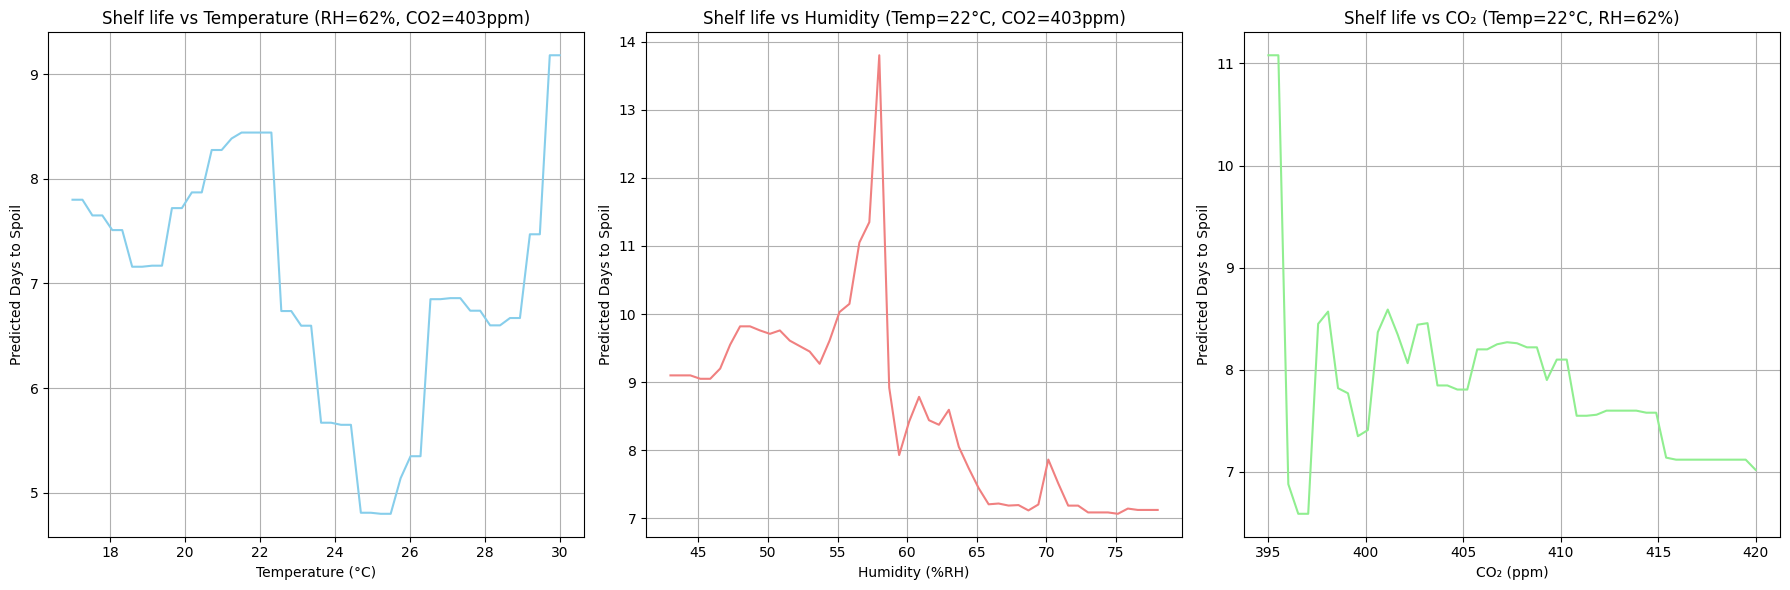

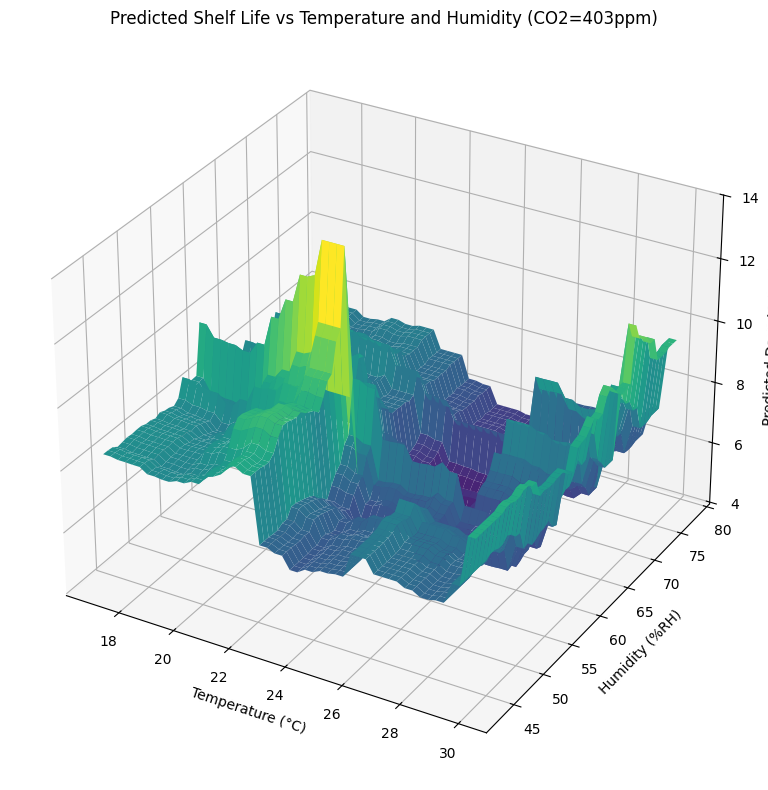

2D and 3D visualizations generated successfully.


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("Generating 2D and 3D visualizations for shelf life...")

# 1. Create a range of values for temperature, humidity, and CO2
# Define the range for each variable. Using values observed in fruits_sensor_df
t_min, t_max = X_reg['temp_c'].min(), X_reg['temp_c'].max()
h_min, h_max = X_reg['rh_pct'].min(), X_reg['rh_pct'].max()
co2_fixed = X_reg['co2_ppm'].mean() # Fix CO2 at its average for 2D plots

# Create a more granular range for plotting
T = np.linspace(t_min, t_max, 50)
H = np.linspace(h_min, h_max, 50)
CO2 = np.linspace(X_reg['co2_ppm'].min(), X_reg['co2_ppm'].max(), 50)

# Helper function to predict shelf life for plotting
def predict_for_plot(temp, rh, co2):
    input_df = pd.DataFrame({'temp_c': temp, 'rh_pct': rh, 'co2_ppm': co2})
    return regressor_pipe.predict(input_df)

# --- 2D Visualizations ---

plt.figure(figsize=(18, 6))

# a. Shelf life vs Temperature (at fixed humidity and CO2)
plt.subplot(1, 3, 1)
fixed_rh_temp = X_reg['rh_pct'].mean()
fixed_co2_temp = co2_fixed
shelf_life_temp = predict_for_plot(T, np.full_like(T, fixed_rh_temp), np.full_like(T, fixed_co2_temp))
plt.plot(T, shelf_life_temp, color='skyblue')
plt.title(f'Shelf life vs Temperature (RH={fixed_rh_temp:.0f}%, CO2={fixed_co2_temp:.0f}ppm)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Predicted Days to Spoil')
plt.grid(True)

# b. Shelf life vs Humidity (at fixed temperature and CO2)
plt.subplot(1, 3, 2)
fixed_temp_rh = X_reg['temp_c'].mean()
fixed_co2_rh = co2_fixed
shelf_life_rh = predict_for_plot(np.full_like(H, fixed_temp_rh), H, np.full_like(H, fixed_co2_rh))
plt.plot(H, shelf_life_rh, color='lightcoral')
plt.title(f'Shelf life vs Humidity (Temp={fixed_temp_rh:.0f}°C, CO2={fixed_co2_rh:.0f}ppm)')
plt.xlabel('Humidity (%RH)')
plt.ylabel('Predicted Days to Spoil')
plt.grid(True)

# c. Shelf life vs CO2 (at fixed temperature and humidity)
plt.subplot(1, 3, 3)
fixed_temp_co2 = X_reg['temp_c'].mean()
fixed_rh_co2 = X_reg['rh_pct'].mean()
shelf_life_co2 = predict_for_plot(np.full_like(CO2, fixed_temp_co2), np.full_like(CO2, fixed_rh_co2), CO2)
plt.plot(CO2, shelf_life_co2, color='lightgreen')
plt.title(f'Shelf life vs CO₂ (Temp={fixed_temp_co2:.0f}°C, RH={fixed_rh_co2:.0f}%)')
plt.xlabel('CO₂ (ppm)')
plt.ylabel('Predicted Days to Spoil')
plt.grid(True)

plt.tight_layout()
plt.show()

# --- 3D Visualization ---

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for Temperature and Humidity, keeping CO2 fixed
TT, HH = np.meshgrid(T, H)

# Predict shelf life for each point in the meshgrid
ZZ = np.array([predict_for_plot([tt], [hh], [co2_fixed])[0] for tt, hh in zip(np.ravel(TT), np.ravel(HH))])
ZZ = ZZ.reshape(TT.shape)

# Plot the surface
ax.plot_surface(TT, HH, ZZ, cmap='viridis')

ax.set_title(f'Predicted Shelf Life vs Temperature and Humidity (CO2={co2_fixed:.0f}ppm)')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%RH)')
ax.set_zlabel('Predicted Days to Spoil')

plt.tight_layout()
plt.show()

print("2D and 3D visualizations generated successfully.")

In [ ]:
print("Preparing reg_df for regressor...")

# 1. Filter dataset_df for 'spoiled=0' and select relevant columns
fresh_dataset_df = dataset_df[dataset_df['spoiled'] == 0][['temp_c', 'rh_pct', 'co2_ppm', 'days_of_storage']]
# Rename 'days_of_storage' to 'days_to_spoil' to match fruits_sensor_df
fresh_dataset_df = fresh_dataset_df.rename(columns={'days_of_storage': 'days_to_spoil'})

# 2. Concatenate fresh_dataset_df with fruits_sensor_df to form reg_df
# Ensure fruits_sensor_df only has the relevant columns before concatenation
reg_df = pd.concat([fresh_dataset_df, fruits_sensor_df[['temp_c', 'rh_pct', 'co2_ppm', 'days_to_spoil']]], ignore_index=True)

# 3. Define the feature set X_reg from reg_df
X_reg = reg_df[['temp_c', 'rh_pct', 'co2_ppm']]

# 4. Define the target variable y_reg from reg_df
y_reg = reg_df['days_to_spoil']

# 5. Print shapes and display heads
print("reg_df prepared successfully.")
print(f"X_reg shape: {X_reg.shape}")
print(f"y_reg shape: {y_reg.shape}")
display(X_reg.head())
display(y_reg.head())

Preparing reg_df for regressor...
reg_df prepared successfully.
X_reg shape: (280, 3)
y_reg shape: (280,)


,temp_c,rh_pct,co2_ppm
0,18,58,410
1,17,61,404
2,27,69,401
3,18,66,400
4,18,66,400


,days_to_spoil
0,5
1,7
2,3
3,5
4,5


In [ ]:
print("Retraining and evaluating RandomForestRegressor with updated data...")

# Split data for regressor
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
print(f"Regressor training data shape: {X_train_r.shape}, target shape: {y_train_r.shape}")
print(f"Regressor validation data shape: {X_val_r.shape}, target shape: {y_val_r.shape}")

# Initialize RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create a pipeline for RandomForestRegressor
regressor_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', rf_regressor)
])

# Fit the pipeline to the training data
regressor_pipe.fit(X_train_r, y_train_r)

# Make predictions on the validation set
y_pred_r = regressor_pipe.predict(X_val_r)

# Evaluate the Regressor
mae = mean_absolute_error(y_val_r, y_pred_r)
mse = mean_squared_error(y_val_r, y_pred_r)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_r, y_pred_r)

print("\nRandomForestRegressor Evaluation (Retrained):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

print("RandomForestRegressor retrained and evaluated successfully.")

Retraining and evaluating RandomForestRegressor with updated data...
Regressor training data shape: (224, 3), target shape: (224,)
Regressor validation data shape: (56, 3), target shape: (56,)

RandomForestRegressor Evaluation (Retrained):
Mean Absolute Error (MAE): 1.8512
Mean Squared Error (MSE): 7.5069
Root Mean Squared Error (RMSE): 2.7399
R-squared (R2) Score: 0.3146
RandomForestRegressor retrained and evaluated successfully.


In [ ]:
print("Testing predict_quality_and_shelf_life function with example inputs...")

# Example usage:
temp_input = 20
rh_input = 70
co2_input = 400
days_input = 5
fruit_input = 'Apples'

spoiled_status, predicted_shelf_life = predict_quality_and_shelf_life(temp_input, rh_input, co2_input, days_input, fruit_input)

print(f"\nPrediction for {fruit_input} under conditions: Temperature={temp_input}°C, Humidity={rh_input}%, CO2={co2_input}ppm, Days Stored={days_input}:")
print(f"  Spoilage Status: {spoiled_status}")
print(f"  Predicted Shelf Life: {predicted_shelf_life:.2f} days")

print("Function test completed.")

Testing predict_quality_and_shelf_life function with example inputs...

Prediction for Apples under conditions: Temperature=20°C, Humidity=70%, CO2=400ppm, Days Stored=5:
  Spoilage Status: Not Spoiled
  Predicted Shelf Life: 4.50 days
Function test completed.
